# Pré processamento

## Imports e configurações

In [8]:
from Strategies.ModelStrategy import ModelStrategy
from sklearn.base import clone
from Enums.ModelsType import ModelsType

main_model = ModelStrategy().ModelStrategy(ModelsType.LogisticRegression.value)

## Carregamento do Dataset

Para começarmos os tratamentos de dados, primeiro vamos fazer uma análise sobre o data set. Para isso precisamos carrega-lo.

In [5]:
from DataLoader.DataLoading import DataLoader

#Carregando o dataset
dataLoader = DataLoader('./Datasets/heart_failure_clinical_records_dataset.csv')
dataset = dataLoader.load_data()

Dataset carregado com sucesso!


## Exploração dos Dados (EDA)

Agora que ja carregamos o dataset, vamos fazer as primeiras análises básicas para entender como os dados são organizados, podendo ver tambem os seus tipos.

In [61]:
from DataEngineering.DataExplorer import DataExplorer

#Análise inicial
data_explorer = DataExplorer(dataset)
data_explorer.analyze()

Primeiras linhas do dataset:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0 

In [63]:
from DataEngineering.DataTypeValidator import DataTypeValidator

# Validação dos tipos de dados
data_type_validator = DataTypeValidator(dataset)
data_type_validator.validate_types()


Tipos de dados antes da validação:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Validação concluída.


## Identificar Outliers

### Visualização inicial - Histogramas

Faremos agora uma análise visual para melhor identificar outliers. Para isso plotaremos os histogramas para identificar se os dados seguem uma distribuição normal. Faremos isso somente para colunas numéricas.

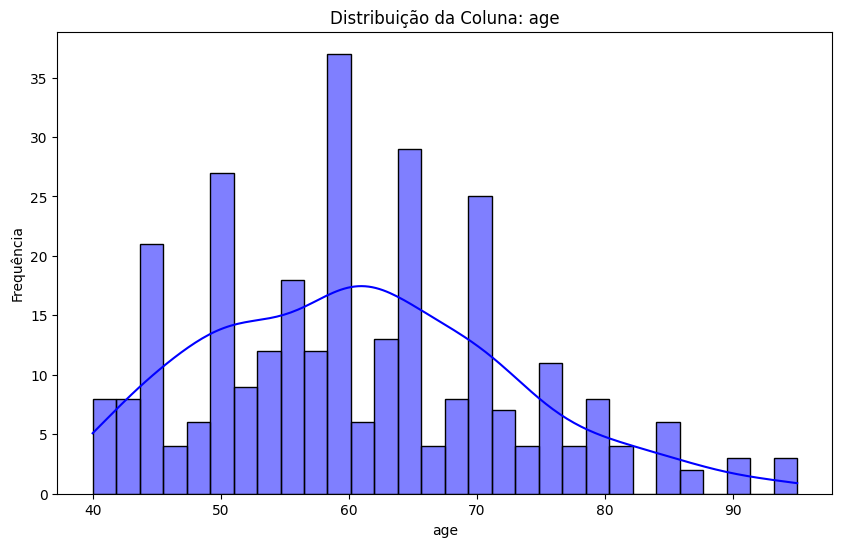

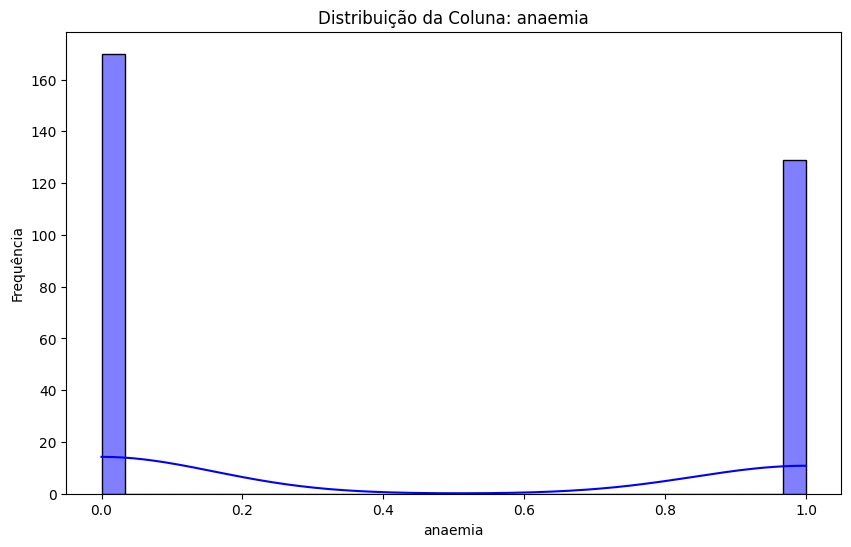

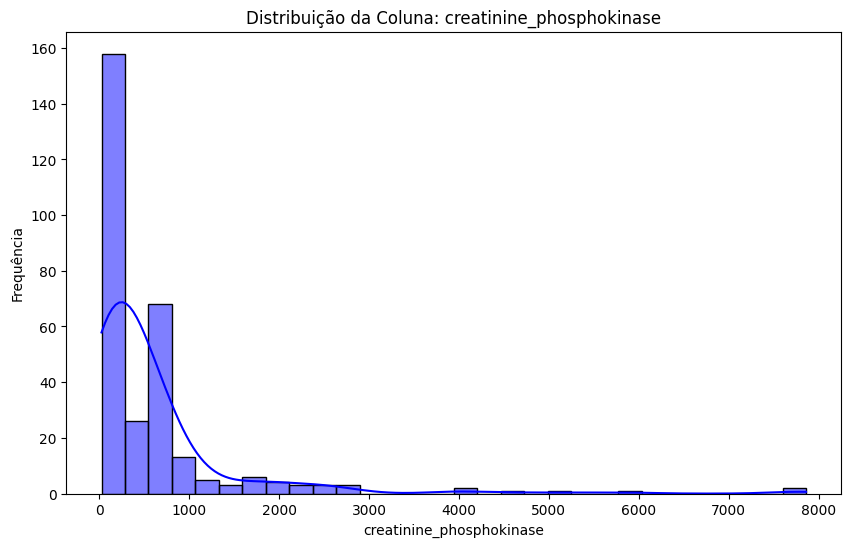

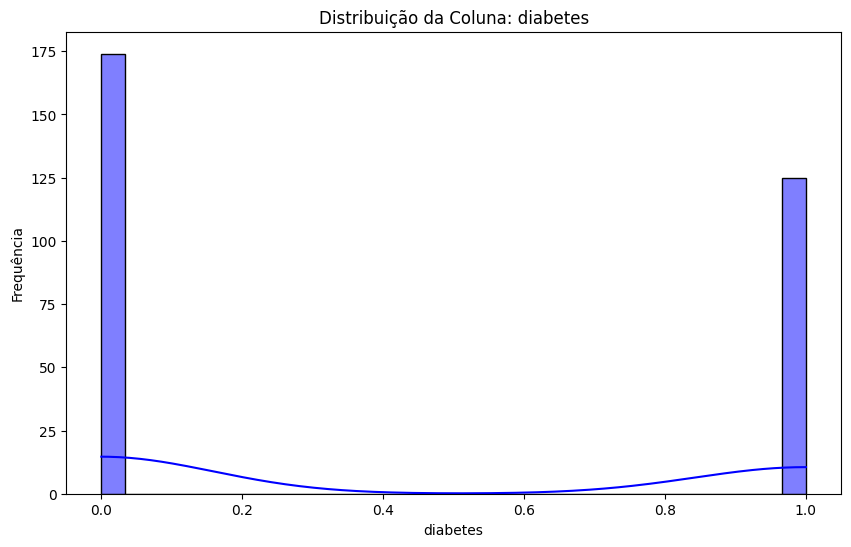

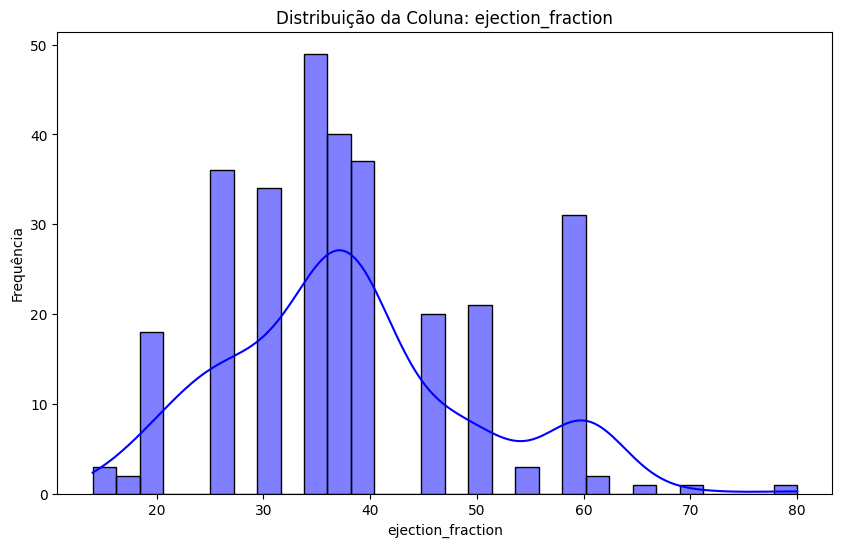

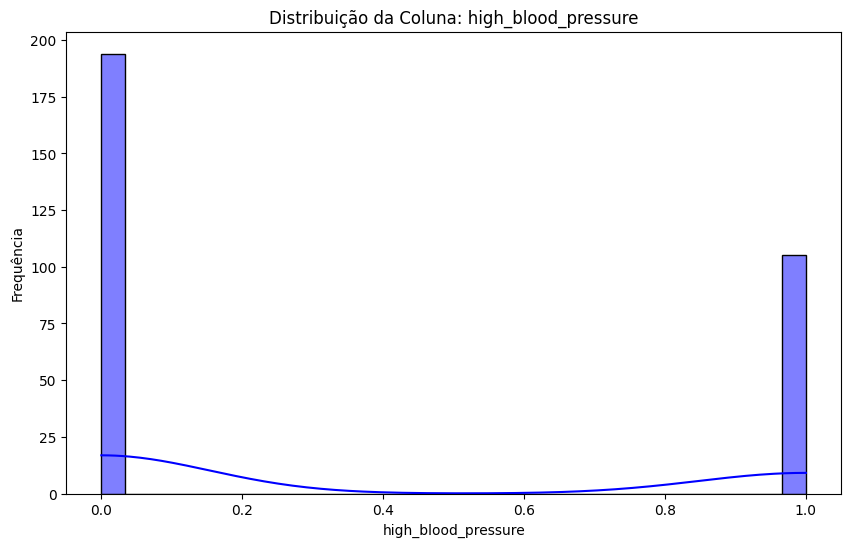

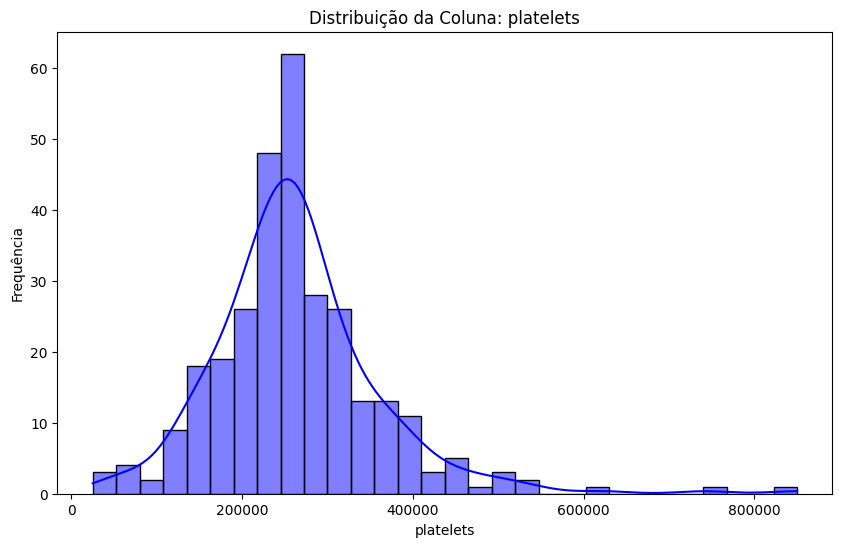

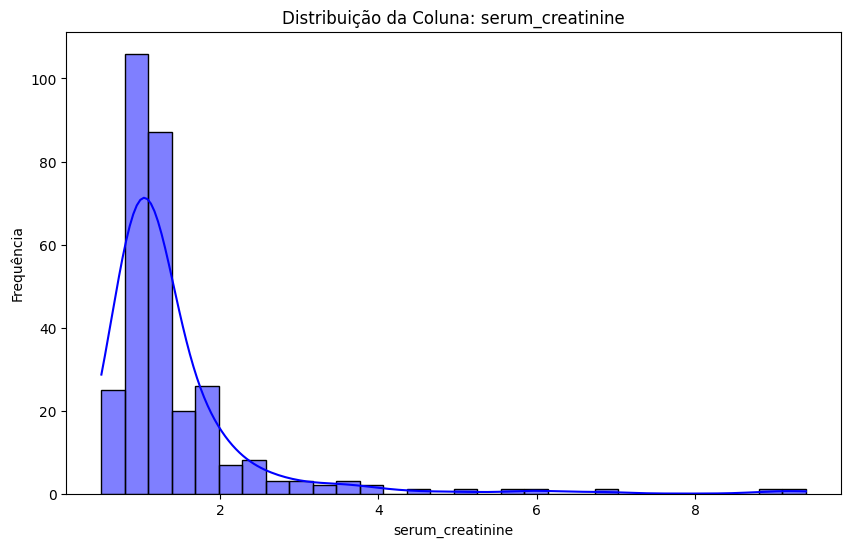

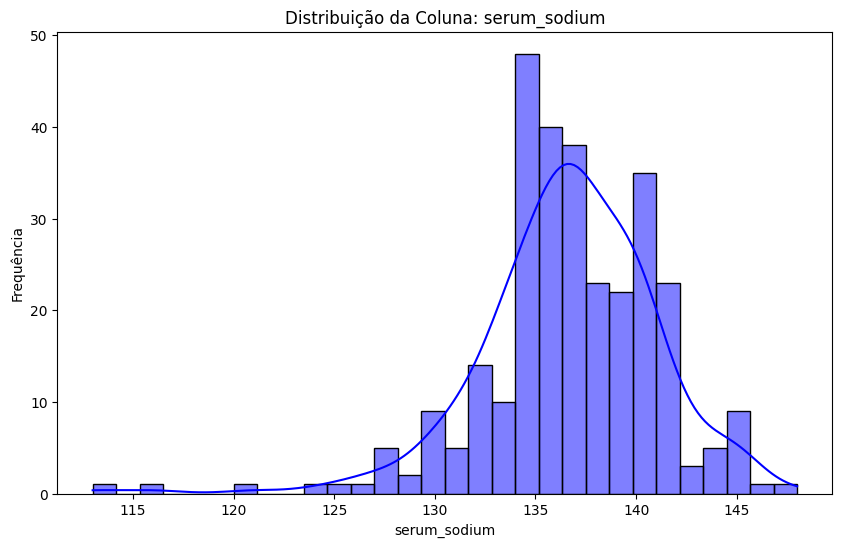

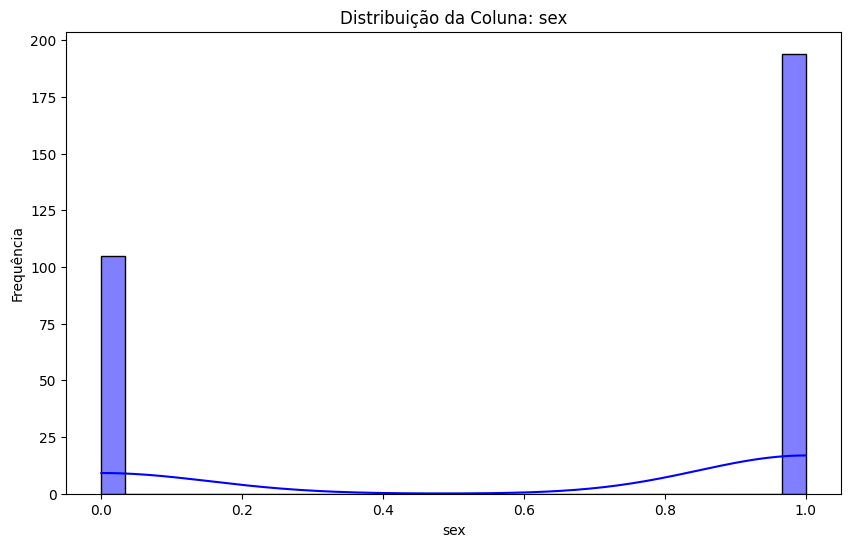

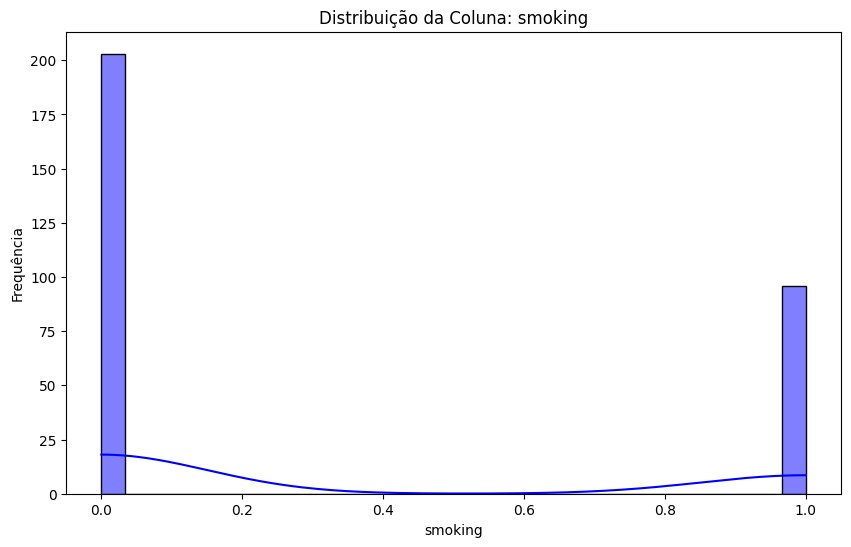

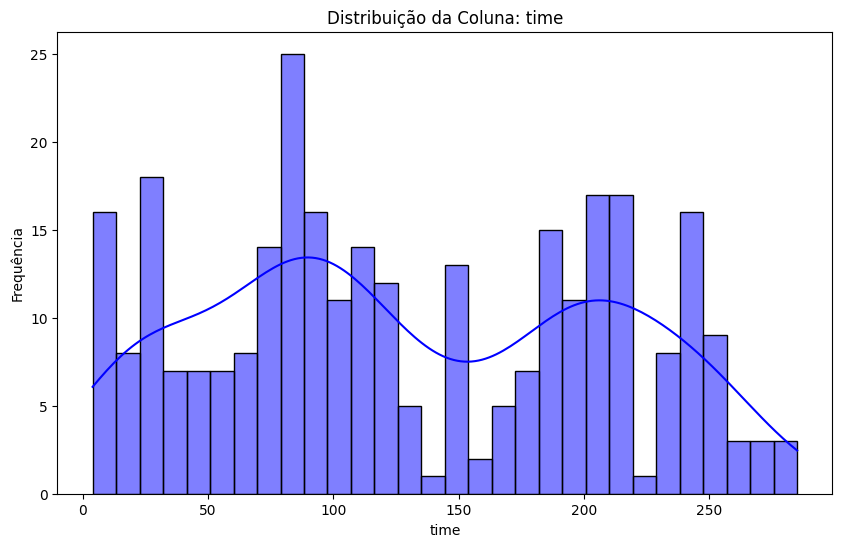

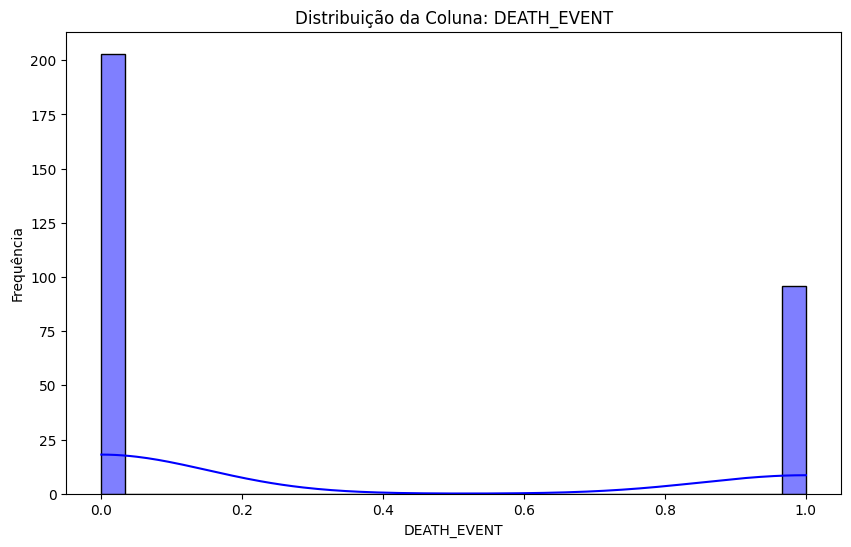

In [81]:
from DataEngineering.DataVisualizer import DataVisualizer

# Análise visual de distribuições e outliers
data_visualizer = DataVisualizer(dataset)
data_visualizer.plot_distributions()

### Identificação de Outliers

In [66]:
from DataEngineering.OutlierAnalyser import OutlierAnalyzer

outlier_analyzer = OutlierAnalyzer(dataset)

# Detectar outliers usando o método IQR
outliers_iqr = outlier_analyzer.detect_outliers_iqr()
print(f"Detecção de outlers por IQR")
# Exibir os índices de outliers para cada coluna
for column, indices in outliers_iqr.items():
    if indices:
        print(f"Coluna '{column}' possui {len(indices)} outliers: {indices}")

# Detectar outliers usando o método Z-Score
outliers_zscore = outlier_analyzer.detect_outliers_zscore()
print(f"Detecção de outlers por Z-Score")
# Exibir os índices de outliers para cada coluna
for column, indices in outliers_zscore.items():
    if indices:
        print(f"Coluna '{column}' possui {len(indices)} outliers: {indices}")


Detecção de outlers por IQR
Coluna 'creatinine_phosphokinase' possui 29 outliers: [1, 38, 46, 52, 60, 72, 103, 107, 130, 134, 139, 147, 149, 153, 163, 164, 171, 176, 187, 200, 208, 227, 246, 250, 280, 283, 295, 296, 297]
Coluna 'ejection_fraction' possui 2 outliers: [64, 217]
Coluna 'platelets' possui 21 outliers: [7, 15, 47, 55, 69, 105, 109, 117, 162, 163, 167, 200, 212, 224, 230, 240, 277, 279, 281, 287, 296]
Coluna 'serum_creatinine' possui 29 outliers: [4, 9, 10, 28, 31, 35, 38, 39, 48, 52, 54, 56, 61, 65, 82, 104, 117, 124, 129, 131, 150, 167, 183, 203, 217, 228, 247, 281, 282]
Coluna 'serum_sodium' possui 4 outliers: [4, 19, 126, 199]
Detecção de outlers por Z-Score
Coluna 'creatinine_phosphokinase' possui 7 outliers: [1, 52, 60, 72, 103, 134, 171]
Coluna 'ejection_fraction' possui 1 outliers: [64]
Coluna 'platelets' possui 3 outliers: [105, 109, 296]
Coluna 'serum_creatinine' possui 6 outliers: [9, 28, 52, 131, 217, 228]
Coluna 'serum_sodium' possui 3 outliers: [4, 19, 199]


Podemos então plotar boxPlot para as colunas listadas acima

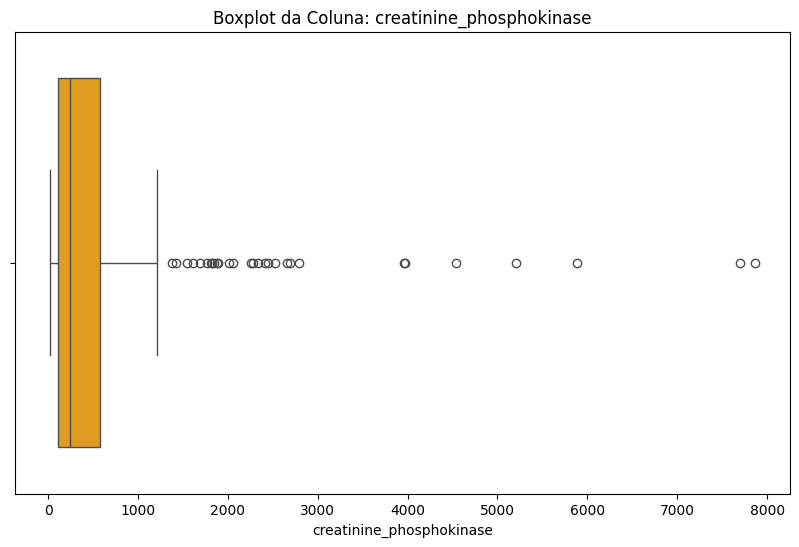

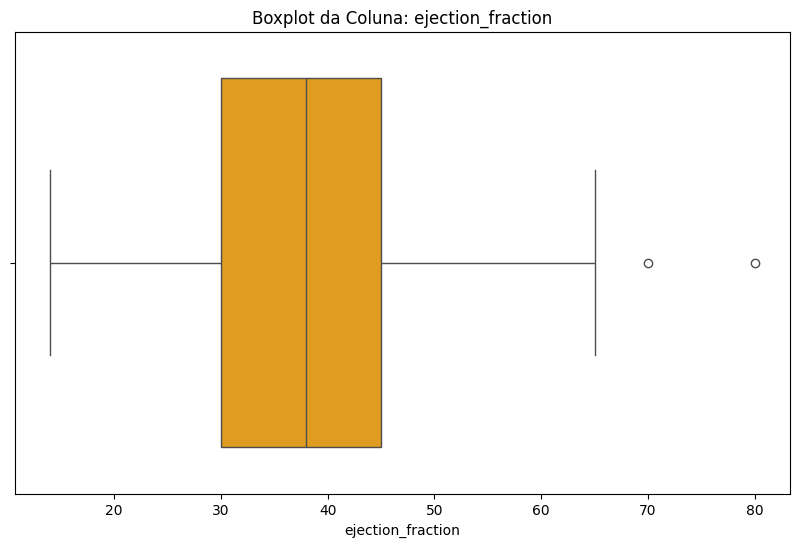

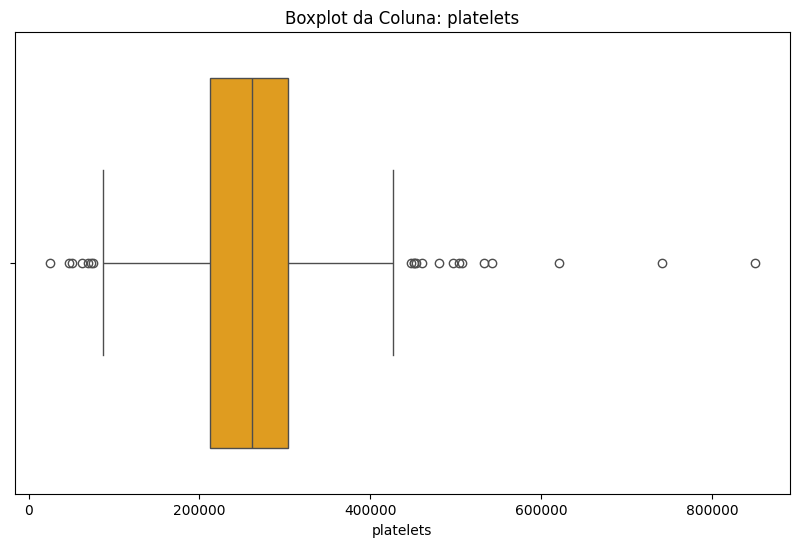

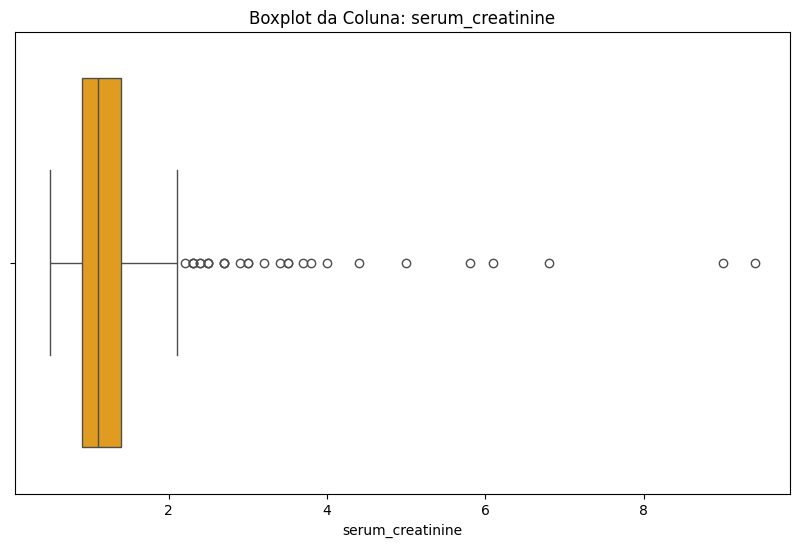

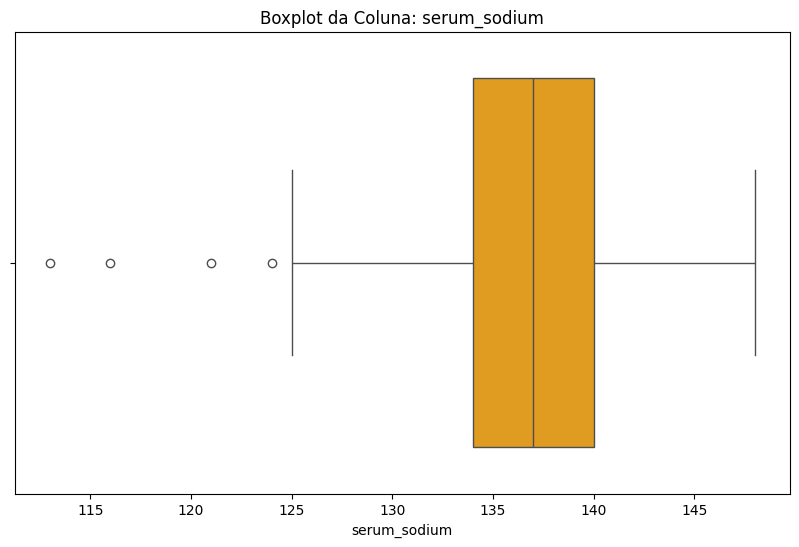

In [67]:
# Filtrar as colunas que possuem outliers detectados pelo Z-Score
columns_with_outliers = [column for column, indices in outliers_iqr.items() if indices]

# Plotar boxplots apenas para as colunas com outliers
data_visualizer.plot_boxplots(columns_with_outliers)


Porém, para o problema que se deseja solucionar, talvez esses nao sejam o melhor método para detectar outliers, visto que cada feature tem suas características e me dizem coisas diferentes.

In [68]:
# Detectando os outliers com base nos limites clínicos
from Dictionaries.features_limits import features_limits

outlier_results = {}
for column, (min_val, max_val) in features_limits.items():
    print(f"\nAnalisando outliers na coluna '{column}'...")
    outliers = outlier_analyzer.check_custom_limits(min_val, max_val, column)
    outlier_results[column] = outliers


Analisando outliers na coluna 'creatinine_phosphokinase'...
Coluna 'creatinine_phosphokinase' possui 141 outliers: [0, 1, 7, 12, 15, 17, 19, 24, 30, 31, 35, 37, 38, 40, 42, 44, 45, 46, 47, 48, 50, 52, 55, 57, 58, 59, 60, 61, 63, 64, 71, 72, 74, 79, 81, 91, 92, 96, 100, 101, 102, 103, 105, 106, 107, 108, 112, 114, 115, 119, 120, 123, 124, 125, 130, 131, 132, 134, 135, 137, 139, 140, 142, 144, 147, 148, 149, 151, 153, 154, 158, 162, 163, 164, 165, 168, 169, 170, 171, 176, 179, 180, 182, 186, 187, 190, 194, 195, 196, 198, 199, 200, 201, 208, 209, 211, 215, 216, 217, 218, 219, 220, 223, 224, 225, 227, 233, 234, 238, 241, 243, 244, 246, 248, 250, 251, 254, 256, 261, 264, 265, 266, 268, 269, 270, 271, 275, 276, 277, 278, 280, 281, 283, 287, 288, 289, 290, 291, 295, 296, 297]

Analisando outliers na coluna 'ejection_fraction'...
Coluna 'ejection_fraction' possui 187 outliers: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 28, 29, 30, 32, 33, 35, 38, 39, 40, 41, 

## Normalização e Padronização de variáveis


Nesta etapa vamos abordar algumas técnicas de normalizaçao ou padronização para validar qual se adequa melhor ao nosso propósito, pois alguns algorítimos de Machine Learning podem ser sensíveis a escala dos dados. A priori desejamos uma estratégia que preserve os outliers, pois eles podem ser indicativos para insuficiência cardíaca.

Para nossa estratégia vamos testar a normalizaçao e a padronização e testar em um modelo de Regressão Logística para comparar os resultados. Primeiro iremos separar o dataset.

In [6]:
from DataEngineering.DataScaler import DataScaler
from Strategies.ScalerStrategy import ScalerStrategy
from sklearn.linear_model import LogisticRegression
from Enums import Scalers
from Enums.ColunsDatasetColuns import DatasetColuns

# Instanciar a classe DataScaler
scaler_strategy = ScalerStrategy()
data_scaler = DataScaler(dataset, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = data_scaler.split_data()

### Normalização por MinMax Scaler

In [7]:
# Aplicar MinMax
X_train_minmax, X_test_minmax = data_scaler.scale_data(X_train, X_test, Scalers.ScalerTypes.MinMaxScaler.value)

# Treinar modelo com dados do MinMax
model_minmax = clone(main_model)
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)

### Normalização por Padronização

In [9]:
# Aplicar padronização
X_train_standard, X_test_standard = data_scaler.scale_data(X_train, X_test, Scalers.ScalerTypes.StandardScaler.value)

# Treinar modelo com dados do padronização
model_standard = clone(main_model)
model_standard.fit(X_train_standard, y_train)
y_pred_standard = model_standard.predict(X_test_standard)

### Normalização RobustScaler

In [10]:
# Aplicar RobustScaler
X_train_robust, X_test_robust = data_scaler.scale_data(X_train, X_test, Scalers.ScalerTypes.RobustScaler.value)

# Treinar modelo com dados RobustScaler
model_robust = clone(main_model)
model_robust.fit(X_train_robust, y_train)
y_pred_robust = model_robust.predict(X_test_robust)

### Normalização por MaxAbsScaler

In [11]:
# Aplicar MaxAbsScaler
X_train_maxabs, X_test_maxabs = data_scaler.scale_data(X_train, X_test, Scalers.ScalerTypes.MaxAbsScaler.value)

# Treinar modelo com dados MaxAbsScaler
model_maxabs = clone(main_model)
model_maxabs.fit(X_train_maxabs, y_train)
y_pred_maxabs = model_maxabs.predict(X_test_maxabs)

### Normalizaçao por Normalizer

In [12]:
# Aplicar Normalizer
X_train_normalizer, X_test_normalizer = data_scaler.scale_data(X_train, X_test, Scalers.ScalerTypes.Normalizer.value)

# Treinar modelo com dados Normalizer
model_normalizer = clone(main_model)
model_normalizer.fit(X_train_normalizer, y_train)
y_pred_normalizer = model_normalizer.predict(X_test_normalizer)

### Comparando modelos

In [13]:
# Avaliar dados do MinMax
data_scaler.evaluate_model(y_test, y_pred_minmax, Scalers.ScalerTypes.MinMaxScaler.value)
# Avaliar dados do Padronizacao
data_scaler.evaluate_model(y_test, y_pred_standard, Scalers.ScalerTypes.StandardScaler.value)
# Avaliar dados do RobustScaler
data_scaler.evaluate_model(y_test, y_pred_robust, Scalers.ScalerTypes.RobustScaler.value)
# Avaliar dados do MaxAbsScaler
data_scaler.evaluate_model(y_test, y_pred_maxabs, Scalers.ScalerTypes.MaxAbsScaler.value)
# Avaliar dados do Normalizer
data_scaler.evaluate_model(y_test, y_pred_normalizer, Scalers.ScalerTypes.Normalizer.value)


Resultados para minmax:
Acurácia: 0.72
Precisão: 0.90
Recall: 0.36
F1-Score: 0.51

Resultados para standard:
Acurácia: 0.80
Precisão: 0.93
Recall: 0.56
F1-Score: 0.70

Resultados para robust:
Acurácia: 0.80
Precisão: 0.93
Recall: 0.56
F1-Score: 0.70

Resultados para maxabs:
Acurácia: 0.72
Precisão: 0.90
Recall: 0.36
F1-Score: 0.51

Resultados para normalizer:
Acurácia: 0.58
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Verificando qual modelo tem melhor desempenho

In [14]:
# Determinar o melhor método
best_scaling_method = data_scaler.find_best_scaling_method()

Empate entre os seguintes métodos com pontuação 2.99: standard, robust


Devido os métodos StandardScaler e RobustScaler ajustarem os dados para uma distribuiçao mais uniforme, eles obtiveram um melhor desempenho para o nosso problema. Porem o RobustScaler ajusta os dados com base na mediana e no intervalo interquartil (IQR) o que o torna mais resistente a outliers, sendo o mais adequado ao nosso problema.

O método Normalizer, normaliza cada instância individualmente em relação à sua norma (magnitude). Essa abordagem pode ser útil em cenários específicos, mas aqui mostrou resultados muito inferiores aos demais, indicando que ele não é apropriado para o nosso problema.

## Balanceamento de classes

Nesta etapa trataremos o balanceamto da nossa classe alvo. Primeiro verificamos o balaceamento incial e depois qual método de balanceamento melhor se adequava ao nosso cenário.

### Avaliando Balanceamento inicial

Distribuição da variável-alvo:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
0    0.67893
1    0.32107
Name: count, dtype: float64


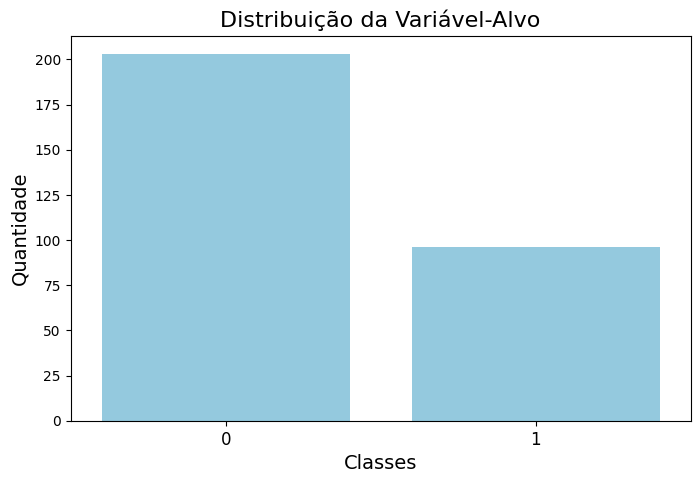

In [16]:
from DataEngineering.BalanceAnalyzer import BalanceAnalyser
from Strategies.BalanceStrategy import BalanceStrategy

# Instanciar o analisador de desbalanceamento
balance_strategy = BalanceStrategy()
balance_analyser = BalanceAnalyser(dataset, 'DEATH_EVENT', balance_strategy)

# Analisar o desbalanceamento
balance_analyser.analyze_distribution()

Percebe-se um desbalanceamento entre em nossa classe alvo, no qual há menos registros de mortes. Sendo assim, precisamos fazer o balanceamento entre as duas classes para que nosso modelo de predição tenha um melhor desempenho.

Vamos testar 3 abordagens para ver qual se adequa melhor ao nosso problema. As abordagens escolhidas sào: oversampling, undersamplig e SMOTETomek, que é uma combinação entre oversampling e undersampling.

### Balancemaneto com Oversampling

Distribuição fornecida:
DEATH_EVENT
1    168
0    168
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


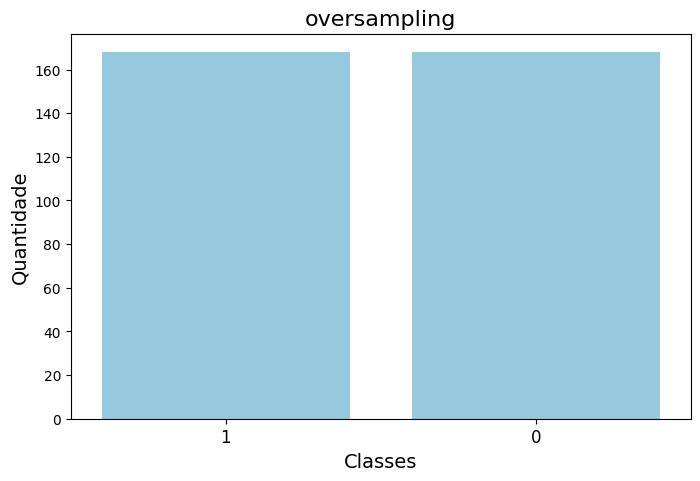

{'accuracy': 0.8,
 'precision': 0.8421052631578947,
 'recall': 0.64,
 'f1_score': 0.7272727272727273}

In [17]:
from Enums.Balances import BalanceTypes
# SMOTE (OVERSAMPLING)
X_train_smote, y_train_smote = balance_analyser.balance(X_train_robust, y_train, BalanceTypes.Oversampling.value)
balance_analyser.analyze_distribution(y_train_smote, title=BalanceTypes.Oversampling.value)

# Treinar modelo
model_smote = clone(main_model)
model_smote.fit(X_train_smote, y_train_smote)

# Predição e avaliação
y_pred_smote = model_smote.predict(X_test_robust)
balance_analyser.evaluate_model(y_test, y_pred_smote, BalanceTypes.Oversampling.value)


### Balanceamento por Undersampling

Distribuição fornecida:
DEATH_EVENT
0    71
1    71
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
0    0.5
1    0.5
Name: count, dtype: float64


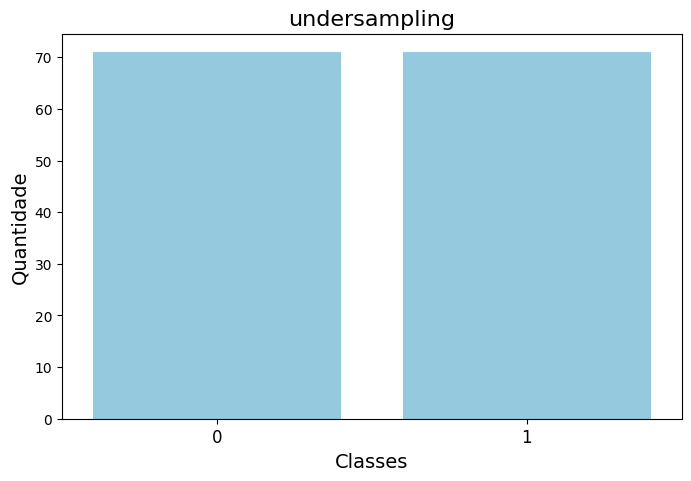

{'accuracy': 0.7833333333333333,
 'precision': 0.8,
 'recall': 0.64,
 'f1_score': 0.7111111111111111}

In [18]:
# UNDERSAMPLING
X_train_under, y_train_under = balance_analyser.balance(X_train_robust, y_train, BalanceTypes.Undersampling.value)
balance_analyser.analyze_distribution(y_train_under, title=BalanceTypes.Undersampling.value)

# Treinar modelo
model_under = clone(main_model)
model_under.fit(X_train_under, y_train_under)

# Predição e avaliação
y_pred_under = model_under.predict(X_test_robust)
balance_analyser.evaluate_model(y_test, y_pred_under, BalanceTypes.Undersampling.value)

### Balanceamento por SMOTETomek

Distribuição fornecida:
DEATH_EVENT
1    164
0    164
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


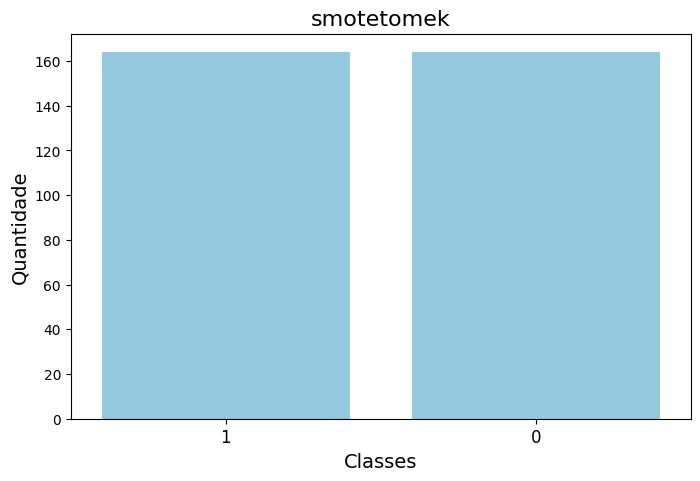

{'accuracy': 0.8,
 'precision': 0.8421052631578947,
 'recall': 0.64,
 'f1_score': 0.7272727272727273}

In [19]:
# COMBINAÇÃO
X_train_combined, y_train_combined = balance_analyser.balance(X_train_robust, y_train, BalanceTypes.SMOTETomek.value)
balance_analyser.analyze_distribution(y_train_combined, title=BalanceTypes.SMOTETomek.value)

# Treinar modelo
model_combined = clone(main_model)
model_combined.fit(X_train_combined, y_train_combined)

# Predição e avaliação
y_pred_combined = model_combined.predict(X_test_robust)
balance_analyser.evaluate_model(y_test, y_pred_combined, BalanceTypes.SMOTETomek.value)

### Comparação das estratégias de balanceamento

In [20]:
# Comparar os resultados
best_strategy = balance_analyser.compare_strategies()

print(f"Melhor estratégia de balanceamento: {best_strategy}")

Resultados comparativos:
               accuracy  precision  recall  f1_score
oversampling   0.800000   0.842105    0.64  0.727273
undersampling  0.783333   0.800000    0.64  0.711111
smotetomek     0.800000   0.842105    0.64  0.727273
Melhor estratégia: oversampling com F1-Score 0.73
Melhor estratégia de balanceamento: oversampling


Como o Oversampling e o SMOTETomek tiveram o mesmo rendimento, vamos analisa-los colocando mais algumas estatisticaas como ROC-AUC, PR-AUC e a Matriz de Confusão

- ROC-AUC: Mede a capacidade do modelo em distinguir entre as classes.
- PR-AUC: Avalia a relação entre precisão e recall, útil em datasets desbalanceados.
- Matriz de Confusão: Para observar como o modelo classifica verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.


--- Avaliando com oversampling ---

[oversampling] - LogisticRegression
Accuracy: 0.80
Precision: 0.84
Recall: 0.64
F1-Score: 0.73
ROC-AUC: 0.8240000000000001
PR-AUC: 0.8112349836342236
Confusion Matrix:
[[32  3]
 [ 9 16]]


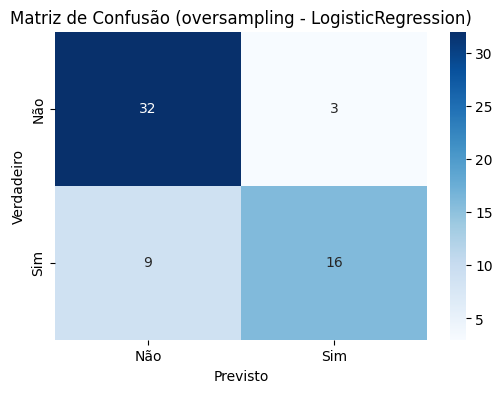


--- Avaliando com smotetomek ---

[smotetomek] - LogisticRegression
Accuracy: 0.80
Precision: 0.84
Recall: 0.64
F1-Score: 0.73
ROC-AUC: 0.8228571428571428
PR-AUC: 0.812354975713194
Confusion Matrix:
[[32  3]
 [ 9 16]]


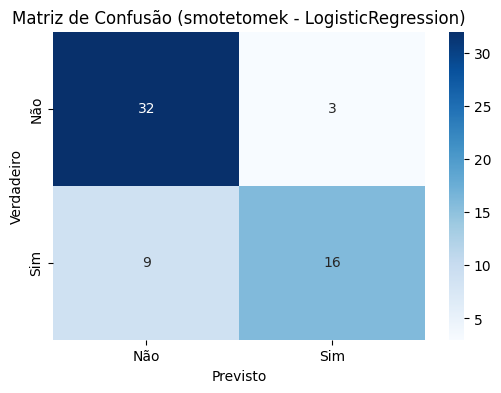


Resultados comparados:
oversampling - ROC-AUC: 0.8240000000000001, PR-AUC: 0.8112349836342236, F1-Score: 0.7272727272727273
smotetomek - ROC-AUC: 0.8228571428571428, PR-AUC: 0.812354975713194, F1-Score: 0.7272727272727273


In [21]:
model = LogisticRegression(random_state=42)
methods = [BalanceTypes.Oversampling.value, BalanceTypes.SMOTETomek.value]
results_comparison = balance_analyser.compare_with_advanced_metrics(model, X_train_robust, y_train, X_test_robust, y_test, methods)

## Feature Selection

Nesta etapa veremos a correlação entre as variáveis pa verificar se há alguma feature que tenha um alto nível de correlação com outra. Se verificar-mos um alto índice de correlação, geralmente considerados acima de 0.8, avaliaremos o modelo após a remoção dessa feature

### Matriz de Correlação

Neste tópico iremos plotar a matriz de correlação para verificarmos a correlação entre as variáveis e tomar-mos as devidas estratégias de tratamento.

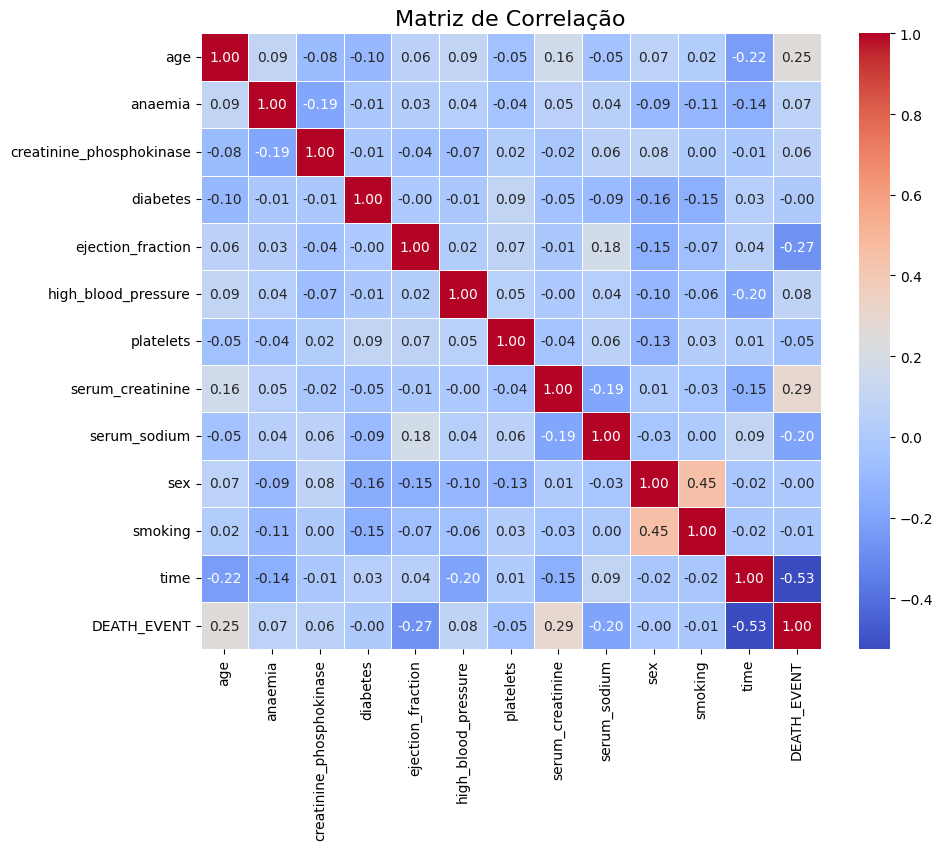

Nenhum par de atributos com correlação alta encontrado.


In [22]:
from DataEngineering.FeatureSelector import FeatureSelector

# Instanciar a classe FeatureSelector
feature_selector = FeatureSelector(dataset)

# Analisar correlação e definir o threshold
high_corr_pairs = feature_selector.analyze_correlation(threshold=0.8)

### Remoção da feature "TIME"

Não idendificamos nenhuma feature com alta correlação, porém não sabemos ao certo o que a varável "TIME" quer nos dizer, podendo ser o tempo de duração do acompanhamento ou também o tempo em que a pessoa levou até a morte depois do início do acompnhamento. Sendo assim, iremos verificar o desempenho do modelo sem essa feature.

In [23]:
from sklearn.linear_model import LogisticRegression
from Enums.Balances import BalanceTypes

# Colunas que deseja remover
columns_to_remove = ["time"]

# Remover a coluna do dataset original
updated_dataset = feature_selector.drop_columns(columns_to_remove)

# Dividir o dataset em X e y novamente
X = updated_dataset.drop(columns=["DEATH_EVENT"]).values
y = updated_dataset["DEATH_EVENT"].values

# Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar os dados usando RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(X_train)
X_test_robust = scaler.transform(X_test)

# Aplicar balanceamento usando SMOTETomek
X_train_balanced, y_train_balanced = balance_analyser.balance(X_train_robust, y_train, BalanceTypes.SMOTETomek.value)

# Instanciar e treinar o modelo
model = clone(main_model)
model.fit(X_train_balanced, y_train_balanced)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test_robust)
metrics_after_removal = balance_analyser.evaluate_model(y_test, y_pred, f"Model after removing columns: {columns_to_remove}")

# Exibir as métricas
print("Métricas após a remoção da coluna:")
print(metrics_after_removal)


Removendo as colunas: ['time']
Métricas após a remoção da coluna:
{'accuracy': 0.65, 'precision': 0.45, 'recall': 0.47368421052631576, 'f1_score': 0.46153846153846156}


## Feature Engeneering

Nesta etapa vamos criar novas features a partir da que ja temos e avaliar o modelo. Nosso objetivo é tentar ver se essas novas features ajudarão a melhorar o desempenho do modelo na predição de casos de insuficiência cardíaca.

Realizando algumas pesquisas percebemos 3 possíveis oportunidades, são elas:

- age * ejection_fraction: Idade pela fração de ejeção pode indicar o impacto da idade na saúde cardíaca.
- serum_creatinine * serum_sodium: Relacionar esses dois fatores pode indicar um nível mais grave de problemas renais.
- serum_creatinine / serum_sodium: Pode capturar uma relação específica entre os níveis de creatinina e sódio no soro.

Vamos primeiro avaliar a adição de cada um no dataset e depois a combinação deles

### Age * Ejection_Fraction

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Distribuição fornecida:
DEATH_EVENT
1    164
0    164
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


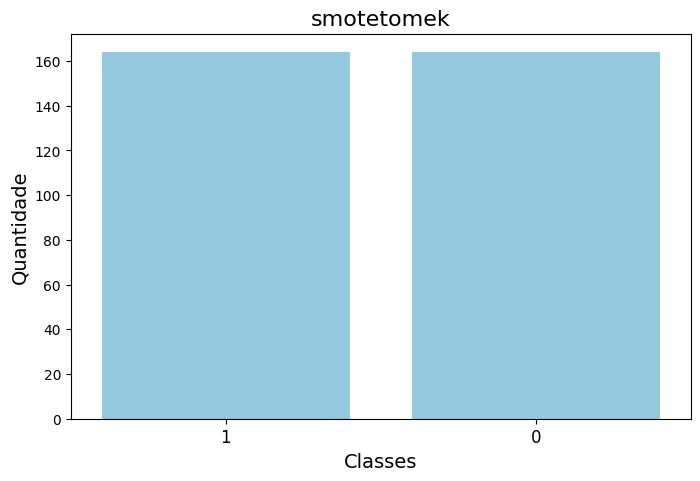

{'accuracy': 0.8,
 'precision': 0.8421052631578947,
 'recall': 0.64,
 'f1_score': 0.7272727272727273}

In [24]:
from DataEngineering.FeatureEngeneering import FeatureEngineer
from sklearn.linear_model import LogisticRegression
from Enums.Balances import BalanceTypes
from Enums.ColunsDatasetColuns import DatasetColuns

dataset_age_ejection_fraction = dataset

# Inicializar o FeatureEngineer com o dataset de treino
feature_engineer_age_ejection_fraction = FeatureEngineer(dataset_age_ejection_fraction)

# Adicionar features de interação no conjunto de treino
coluns_age_ejection_fraction = [DatasetColuns.age.value, DatasetColuns.age.value]

#feature_engineer.add_interaction_features(coluns)
feature_engineer_age_ejection_fraction.add_interaction_features(coluns_age_ejection_fraction)

# Obter o dataset atualizado com as novas features no conjunto de treino
dataset_age_ejection_fraction = feature_engineer_age_ejection_fraction.get_dataset()

# Instanciar a classe DataScaler
scaler_strategy = ScalerStrategy()
data_scaler = DataScaler(dataset_age_ejection_fraction, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Dividir os dados em treino e teste
X_train_age_ejection_fraction, X_test_age_ejection_fraction, y_train_age_ejection_fraction, y_test_age_ejection_fraction = data_scaler.split_data()

# Aplicar RobustScaler
X_train_robust_age_ejection_fraction, X_test_robust_age_ejection_fraction = data_scaler.scale_data(X_train_age_ejection_fraction, X_test_age_ejection_fraction, Scalers.ScalerTypes.RobustScaler.value)

# Treinar modelo com dados RobustScaler
model_robust_age_ejection_fraction = clone(main_model)
model_robust_age_ejection_fraction.fit(X_train_robust_age_ejection_fraction, y_train_age_ejection_fraction)
y_pred_robust_age_ejection_fraction = model_robust_age_ejection_fraction.predict(X_test_robust_age_ejection_fraction)

# COMBINAÇÃO
X_train_combined_age_ejection_fraction, y_train_combined_age_ejection_fraction = balance_analyser.balance(X_train_robust_age_ejection_fraction, y_train_age_ejection_fraction, BalanceTypes.SMOTETomek.value)
balance_analyser.analyze_distribution(y_train_combined, title=BalanceTypes.SMOTETomek.value)

# Treinar modelo
model_combined_age_ejection_fraction = clone(main_model)
model_combined_age_ejection_fraction.fit(X_train_combined_age_ejection_fraction, y_train_combined_age_ejection_fraction)

# Predição e avaliação
y_pred_combined_age_ejection_fraction = model_combined_age_ejection_fraction.predict(X_test_robust_age_ejection_fraction)
balance_analyser.evaluate_model(y_test_age_ejection_fraction, y_pred_combined_age_ejection_fraction, BalanceTypes.SMOTETomek.value)


### Serum_creatinine * Serum_sodium

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Distribuição fornecida:
DEATH_EVENT
1    164
0    164
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


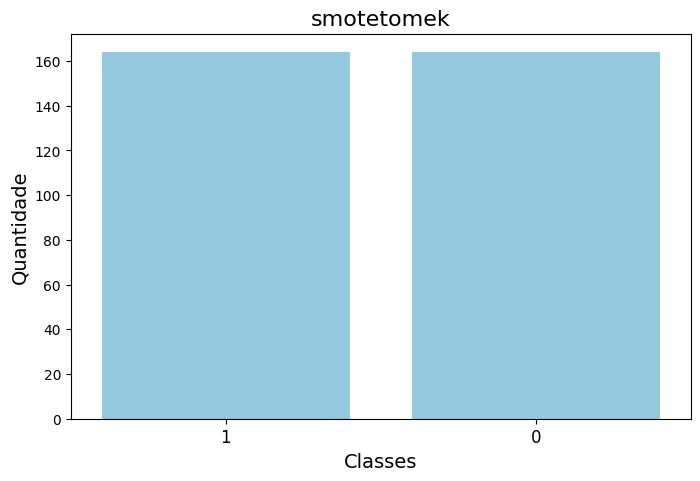

{'accuracy': 0.7833333333333333,
 'precision': 0.8,
 'recall': 0.64,
 'f1_score': 0.7111111111111111}

In [25]:
dataset_creatine_sodium = dataset

# Inicializar o FeatureEngineer com o dataset de treino
feature_engineer_creatine_sodium = FeatureEngineer(dataset_creatine_sodium)

# Adicionar features de interação no conjunto de treino
coluns_creatine_sodium = [DatasetColuns.serum_creatinine.value, DatasetColuns.serum_sodium.value]

#feature_engineer.add_interaction_features(coluns)
feature_engineer_creatine_sodium.add_interaction_features(coluns_creatine_sodium)

# Obter o dataset atualizado com as novas features no conjunto de treino
dataset_creatine_sodium = feature_engineer_creatine_sodium.get_dataset()

# Instanciar a classe DataScaler
scaler_strategy = ScalerStrategy()
data_scaler_creatine_sodium = DataScaler(dataset_creatine_sodium, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Dividir os dados em treino e teste
X_train_creatine_sodium, X_test_creatine_sodium, y_train_creatine_sodium, y_test_creatine_sodium = data_scaler_creatine_sodium.split_data()

# Aplicar RobustScaler
X_train_robust_creatine_sodium, X_test_robust_creatine_sodium = data_scaler_creatine_sodium.scale_data(X_train_creatine_sodium, X_test_creatine_sodium, Scalers.ScalerTypes.RobustScaler.value)

# Treinar modelo com dados RobustScaler
model_robust_creatine_sodium = clone(main_model)
model_robust_creatine_sodium.fit(X_train_robust_creatine_sodium, y_train_creatine_sodium)
y_pred_robust_creatine_sodium = model_robust_creatine_sodium.predict(X_test_robust_creatine_sodium)

# COMBINAÇÃO
X_train_combined_creatine_sodium, y_train_combined_creatine_sodium = balance_analyser.balance(X_train_robust_creatine_sodium, y_train_creatine_sodium, BalanceTypes.SMOTETomek.value)
balance_analyser.analyze_distribution(y_train_combined, title=BalanceTypes.SMOTETomek.value)

# Treinar modelo
model_combined_creatine_sodium = clone(main_model)
model_combined_creatine_sodium.fit(X_train_combined_creatine_sodium, y_train_combined_creatine_sodium)

# Predição e avaliação
y_pred_combined_creatine_sodium = model_combined_creatine_sodium.predict(X_test_robust_creatine_sodium)
balance_analyser.evaluate_model(y_test_creatine_sodium, y_pred_combined_creatine_sodium, BalanceTypes.SMOTETomek.value)


### Serum_creatinine / Serum_sodium

Adicionando features de razão...
Feature de razão adicionada: ['serum_creatinine_div_serum_sodium']
Distribuição fornecida:
DEATH_EVENT
1    164
0    164
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


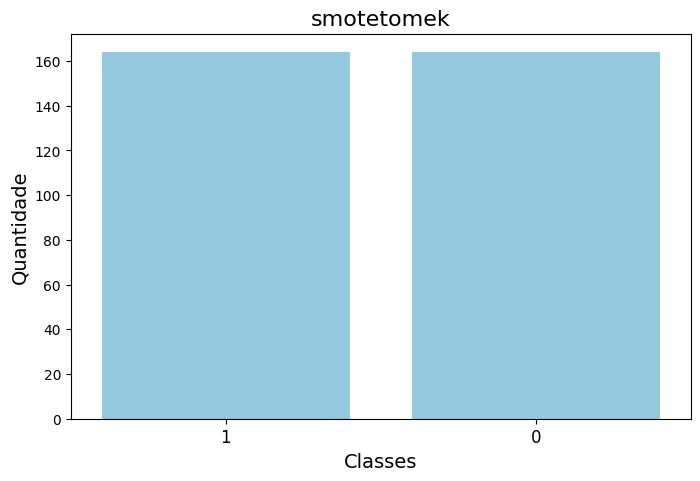

{'accuracy': 0.8,
 'precision': 0.8421052631578947,
 'recall': 0.64,
 'f1_score': 0.7272727272727273}

In [26]:
dataset_creatinine_sodium = dataset
# Inicializar o FeatureEngineer com o dataset de treino
feature_engineer_creatinine_sodium = FeatureEngineer(dataset_creatinine_sodium)

# Adicionar features de razão no conjunto de treino
feature_engineer_creatinine_sodium.add_ratio_features()

# Obter o dataset atualizado com as novas features no conjunto de treino
dataset_creatinine_sodium = feature_engineer_creatinine_sodium.get_dataset()

# Instanciar a classe DataScaler
scaler_strategy = ScalerStrategy()
data_scaler_creatinine_sodium = DataScaler(dataset_creatinine_sodium, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Dividir os dados em treino e teste
X_train_creatinine_sodium, X_test_creatinine_sodium, y_train_creatinine_sodium, y_test_creatinine_sodium = data_scaler_creatinine_sodium.split_data()

# Aplicar RobustScaler
X_train_robust_creatinine_sodium, X_test_robust_creatinine_sodium = data_scaler_creatinine_sodium.scale_data(X_train_creatinine_sodium, X_test_creatinine_sodium, Scalers.ScalerTypes.RobustScaler.value)

# Treinar modelo com dados RobustScaler
model_robust_creatinine_sodium = clone(main_model)
model_robust_creatinine_sodium.fit(X_train_robust, y_train)
y_pred_robust_creatinine_sodium = model_robust_creatinine_sodium.predict(X_test_robust)

# COMBINAÇÃO
X_train_combined_creatinine_sodium, y_train_combined_creatinine_sodium = balance_analyser.balance(X_train_robust_creatinine_sodium, y_train_creatinine_sodium, BalanceTypes.SMOTETomek.value)
balance_analyser.analyze_distribution(y_train_combined_creatinine_sodium, title=BalanceTypes.SMOTETomek.value)

# Treinar modelo
model_combined_creatinine_sodium = clone(main_model)
model_combined_creatinine_sodium.fit(X_train_combined_creatinine_sodium, y_train_combined_creatinine_sodium)

# Predição e avaliação
y_pred_combined_creatinine_sodium = model_combined_creatinine_sodium.predict(X_test_robust_creatinine_sodium)
balance_analyser.evaluate_model(y_test_creatinine_sodium, y_pred_combined_creatinine_sodium, BalanceTypes.SMOTETomek.value)


### Combinação de features

Nós tópicos anteriores vimos a criação de 3 novas features, mas elas sozinhas não afetaram positivamente no desempenho do nosso modelo. Agora veremos se combinando as 3 altera o resultado.

#### 1. (serum_creatinine * serum_sodium) com (serum_creatinine / serum_sodium)

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Adicionando features de razão...
Feature de razão adicionada: ['serum_creatinine_div_serum_sodium']
Distribuição fornecida:
DEATH_EVENT
1    164
0    164
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


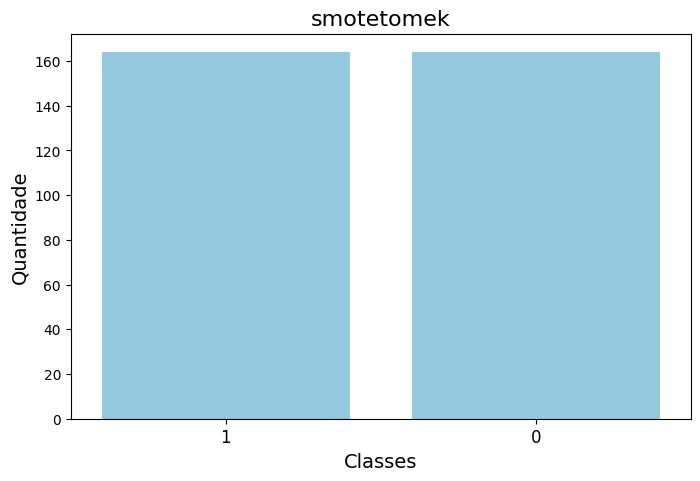

Métricas para o pipeline combinado (serum_creatinine * serum_sodium) com (serum_creatinine / serum_sodium):
{'accuracy': 0.8, 'precision': 0.8421052631578947, 'recall': 0.64, 'f1_score': 0.7272727272727273}


In [27]:
dataset_mixed1 = dataset
# Inicializar o FeatureEngineer com o dataset de treino
feature_engineer_mixed1 = FeatureEngineer(dataset_mixed1)

# Adicionar features de interação no conjunto de treino
coluns_mixed1 = [DatasetColuns.serum_creatinine.value, DatasetColuns.serum_sodium.value]
#feature_engineer.add_interaction_features(coluns)
feature_engineer_mixed1.add_interaction_features(coluns_mixed1)

# Adicionar features de razão no conjunto de treino
feature_engineer_mixed1.add_ratio_features()

# Obter o dataset atualizado com as novas features no conjunto de treino
dataset_mixed1 = feature_engineer_mixed1.get_dataset()

# Instanciar a classe DataScaler
scaler_strategy = ScalerStrategy()
data_scaler_mixed1 = DataScaler(dataset_mixed1, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Dividir os dados em treino e teste
X_train_mixed1, X_test_mixed1, y_train_mixed1, y_test_mixed1 = data_scaler_mixed1.split_data()

# Aplicar RobustScaler
X_train_robust_mixed1, X_test_robust_mixed1 = data_scaler_mixed1.scale_data(X_train_mixed1, X_test_mixed1, Scalers.ScalerTypes.RobustScaler.value)

# Treinar modelo com dados RobustScaler
model_robust_mixed1 = clone(main_model)
model_robust_mixed1.fit(X_train_robust_mixed1, y_train_mixed1)
y_pred_robust_mixed1 = model_robust_mixed1.predict(X_test_robust_mixed1)

# COMBINAÇÃO
X_train_combined_mixed1, y_train_combined_mixed1 = balance_analyser.balance(X_train_robust_mixed1, y_train_mixed1, BalanceTypes.SMOTETomek.value)
balance_analyser.analyze_distribution(y_train_combined_mixed1, title=BalanceTypes.SMOTETomek.value)

# Treinar modelo
model_combined_mixed1 = clone(main_model)
model_combined_mixed1.fit(X_train_combined_mixed1, y_train_combined_mixed1)

# Predição e avaliação
y_pred_combined_mixed1 = model_combined_mixed1.predict(X_test_robust_mixed1)
metrics_mixed1 = balance_analyser.evaluate_model(y_test_mixed1, y_pred_combined_mixed1, BalanceTypes.SMOTETomek.value)

# Exibir as métricas
print("Métricas para o pipeline combinado (serum_creatinine * serum_sodium) com (serum_creatinine / serum_sodium):")
print(metrics_mixed1)

#### 2. (age * ejection_fraction) com (serum_creatinine * serum_sodium)

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Distribuição fornecida:
DEATH_EVENT
1    165
0    165
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


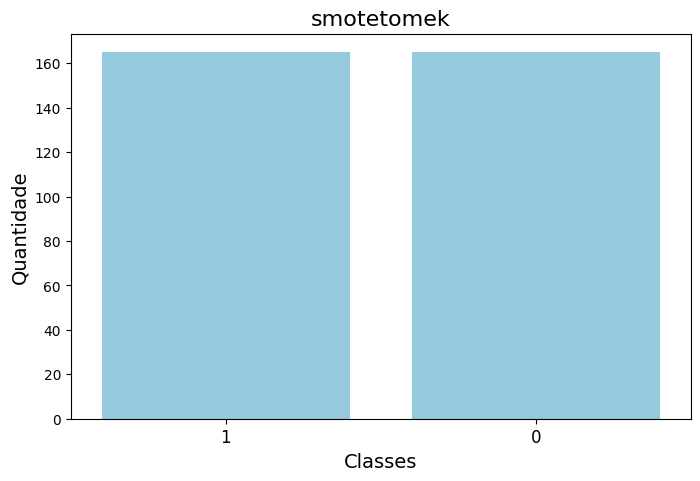

Métricas para o pipeline combinado (age * ejection_fraction) com (serum_creatinine * serum_sodium):
{'accuracy': 0.7833333333333333, 'precision': 0.8, 'recall': 0.64, 'f1_score': 0.7111111111111111}


In [28]:
# Criar uma cópia do dataset original
dataset_mixed2 = dataset.copy()

# Inicializar o FeatureEngineer com o dataset
feature_engineer_mixed2 = FeatureEngineer(dataset_mixed2)

# Adicionar features de interação
coluns_mixed2 = [DatasetColuns.age.value, DatasetColuns.ejection_fraction.value, 
                 DatasetColuns.serum_creatinine.value, DatasetColuns.serum_sodium.value]
feature_engineer_mixed2.add_interaction_features(coluns_mixed2)

# Obter o dataset atualizado com as novas features
dataset_mixed2 = feature_engineer_mixed2.get_dataset()

# Criar a nova feature combinada: produto das duas interações
dataset_mixed2['combined_interaction'] = (
    dataset_mixed2['age_x_ejection_fraction'] * 
    dataset_mixed2['serum_creatinine_x_serum_sodium']
)

# Instanciar a classe DataScaler
scaler_strategy = ScalerStrategy()
data_scaler_mixed2 = DataScaler(dataset_mixed2, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Dividir os dados em treino e teste
X_train_mixed2, X_test_mixed2, y_train_mixed2, y_test_mixed2 = data_scaler_mixed2.split_data()

# Aplicar RobustScaler
X_train_robust_mixed2, X_test_robust_mixed2 = data_scaler_mixed2.scale_data(
    X_train_mixed2, X_test_mixed2, Scalers.ScalerTypes.RobustScaler.value
)

# Treinar modelo com dados escalados
model_robust_mixed2 = clone(main_model)
model_robust_mixed2.fit(X_train_robust_mixed2, y_train_mixed2)
y_pred_robust_mixed2 = model_robust_mixed2.predict(X_test_robust_mixed2)

# COMBINAÇÃO: Aplicar balanceamento usando SMOTETomek
X_train_combined_mixed2, y_train_combined_mixed2 = balance_analyser.balance(
    X_train_robust_mixed2, y_train_mixed2, BalanceTypes.SMOTETomek.value
)
balance_analyser.analyze_distribution(y_train_combined_mixed2, title=BalanceTypes.SMOTETomek.value)

# Treinar modelo com dados balanceados
model_combined_mixed2 = clone(main_model)
model_combined_mixed2.fit(X_train_combined_mixed2, y_train_combined_mixed2)

# Predição e avaliação
y_pred_combined_mixed2 = model_combined_mixed2.predict(X_test_robust_mixed2)
metrics_mixed2 = balance_analyser.evaluate_model(y_test_mixed2, y_pred_combined_mixed2, BalanceTypes.SMOTETomek.value)

# Exibir as métricas
print("Métricas para o pipeline combinado (age * ejection_fraction) com (serum_creatinine * serum_sodium):")
print(metrics_mixed2)

#### 3. (serum_creatinine / serum_sodium) com (age * ejection_fraction)

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Adicionando features de razão...
Feature de razão adicionada: ['serum_creatinine_div_serum_sodium']
Distribuição fornecida:
DEATH_EVENT
1    165
0    165
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


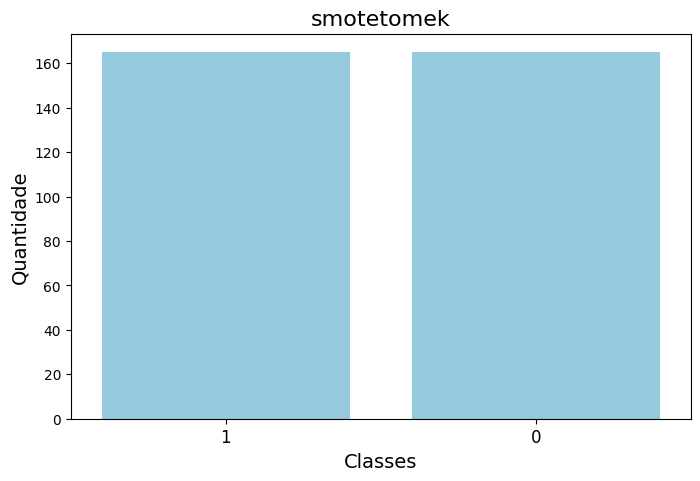

Métricas para o pipeline combinado (serum_creatinine / serum_sodium) com (age * ejection_fraction):
{'accuracy': 0.8, 'precision': 0.8421052631578947, 'recall': 0.64, 'f1_score': 0.7272727272727273}


In [29]:
# Criar uma cópia do dataset original
dataset_mixed3 = dataset.copy()

# Inicializar o FeatureEngineer com o dataset
feature_engineer_mixed3 = FeatureEngineer(dataset_mixed3)

# Adicionar features de interação
coluns_mixed3 = [DatasetColuns.age.value, DatasetColuns.ejection_fraction.value, 
                 DatasetColuns.serum_creatinine.value, DatasetColuns.serum_sodium.value]
feature_engineer_mixed3.add_interaction_features(coluns_mixed3)

# Adicionar features de razão
feature_engineer_mixed3.add_ratio_features()

# Obter o dataset atualizado com as novas features
dataset_mixed3 = feature_engineer_mixed3.get_dataset()

# Criar a nova feature combinada: combinação da razão e da interação
dataset_mixed3['combined_ratio_interaction'] = (
    dataset_mixed3['serum_creatinine_div_serum_sodium'] * 
    dataset_mixed3['age_x_ejection_fraction']
)

# Instanciar a classe DataScaler
scaler_strategy = ScalerStrategy()
data_scaler_mixed3 = DataScaler(dataset_mixed3, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Dividir os dados em treino e teste
X_train_mixed3, X_test_mixed3, y_train_mixed3, y_test_mixed3 = data_scaler_mixed3.split_data()

# Aplicar RobustScaler
X_train_robust_mixed3, X_test_robust_mixed3 = data_scaler_mixed3.scale_data(
    X_train_mixed3, X_test_mixed3, Scalers.ScalerTypes.RobustScaler.value
)

# Treinar modelo com dados escalados
model_robust_mixed3 = clone(main_model)
model_robust_mixed3.fit(X_train_robust_mixed3, y_train_mixed3)
y_pred_robust_mixed3 = model_robust_mixed3.predict(X_test_robust_mixed3)

# COMBINAÇÃO: Aplicar balanceamento usando SMOTETomek
X_train_combined_mixed3, y_train_combined_mixed3 = balance_analyser.balance(
    X_train_robust_mixed3, y_train_mixed3, BalanceTypes.SMOTETomek.value
)
balance_analyser.analyze_distribution(y_train_combined_mixed3, title=BalanceTypes.SMOTETomek.value)

# Treinar modelo com dados balanceados
model_combined_mixed3 = clone(main_model)
model_combined_mixed3.fit(X_train_combined_mixed3, y_train_combined_mixed3)

# Predição e avaliação
y_pred_combined_mixed3 = model_combined_mixed3.predict(X_test_robust_mixed3)
metrics_mixed3 = balance_analyser.evaluate_model(y_test_mixed3, y_pred_combined_mixed3, BalanceTypes.SMOTETomek.value)

# Exibir as métricas
print("Métricas para o pipeline combinado (serum_creatinine / serum_sodium) com (age * ejection_fraction):")
print(metrics_mixed3)


#### Todas as features criadas

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Adicionando features de razão...
Feature de razão adicionada: ['serum_creatinine_div_serum_sodium']
Distribuição fornecida:
DEATH_EVENT
1    165
0    165
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


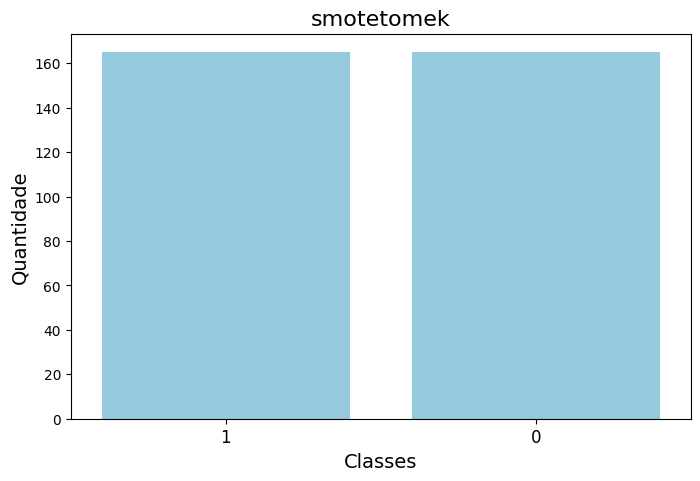

Métricas para o pipeline combinado (todas as features criadas):
{'accuracy': 0.7833333333333333, 'precision': 0.8, 'recall': 0.64, 'f1_score': 0.7111111111111111}


In [30]:
# Criar uma cópia do dataset original
dataset_mixed_all = dataset.copy()

# Inicializar o FeatureEngineer com o dataset
feature_engineer_mixed_all = FeatureEngineer(dataset_mixed_all)

# Adicionar features de interação
coluns_mixed_all = [
    DatasetColuns.age.value,
    DatasetColuns.ejection_fraction.value,
    DatasetColuns.serum_creatinine.value,
    DatasetColuns.serum_sodium.value,
]
feature_engineer_mixed_all.add_interaction_features(coluns_mixed_all)

# Adicionar features de razão
feature_engineer_mixed_all.add_ratio_features()

# Obter o dataset atualizado com as novas features
dataset_mixed_all = feature_engineer_mixed_all.get_dataset()

# Criar a nova feature combinada: soma ponderada de todas as features criadas
dataset_mixed_all['combined_all'] = (
    dataset_mixed_all['serum_creatinine_div_serum_sodium'] +
    dataset_mixed_all['age_x_ejection_fraction'] +
    dataset_mixed_all['serum_creatinine_x_serum_sodium']
)

# Instanciar a classe DataScaler
scaler_strategy = ScalerStrategy()
data_scaler_mixed_all = DataScaler(dataset_mixed_all, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Dividir os dados em treino e teste
X_train_mixed_all, X_test_mixed_all, y_train_mixed_all, y_test_mixed_all = data_scaler_mixed_all.split_data()

# Aplicar RobustScaler
X_train_robust_mixed_all, X_test_robust_mixed_all = data_scaler_mixed_all.scale_data(
    X_train_mixed_all, X_test_mixed_all, Scalers.ScalerTypes.RobustScaler.value
)

# Treinar modelo com dados escalados
model_robust_mixed_all = clone(main_model)
model_robust_mixed_all.fit(X_train_robust_mixed_all, y_train_mixed_all)
y_pred_robust_mixed_all = model_robust_mixed_all.predict(X_test_robust_mixed_all)

# COMBINAÇÃO: Aplicar balanceamento usando SMOTETomek
X_train_combined_mixed_all, y_train_combined_mixed_all = balance_analyser.balance(
    X_train_robust_mixed_all, y_train_mixed_all, BalanceTypes.SMOTETomek.value
)
balance_analyser.analyze_distribution(y_train_combined_mixed_all, title=BalanceTypes.SMOTETomek.value)

# Treinar modelo com dados balanceados
model_combined_mixed_all = clone(main_model)
model_combined_mixed_all.fit(X_train_combined_mixed_all, y_train_combined_mixed_all)

# Predição e avaliação
y_pred_combined_mixed_all = model_combined_mixed_all.predict(X_test_robust_mixed_all)
metrics_mixed_all = balance_analyser.evaluate_model(y_test_mixed_all, y_pred_combined_mixed_all, BalanceTypes.SMOTETomek.value)

# Exibir as métricas
print("Métricas para o pipeline combinado (todas as features criadas):")
print(metrics_mixed_all)


#### Resultado

Observado o resultado do modelo com as novas features percebe-se que na maioria dos casos o desempenho continou o mesmo e em alguns até piorou. Sendo assim, não vamos seguir com essa abordagem, pois a adição dessas features só trará maior complexidade e até mesmo demandará maior capacidade de processamento.

# Pipeline